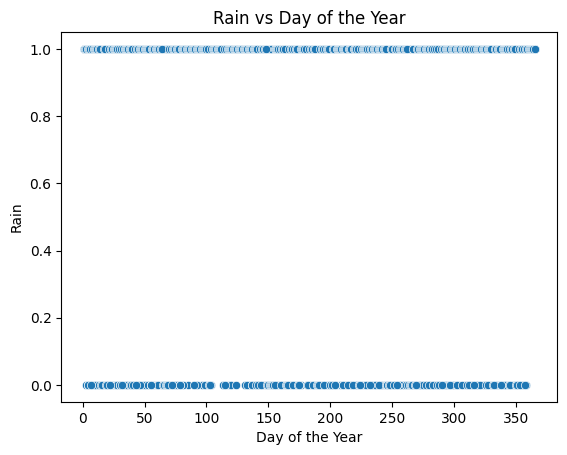

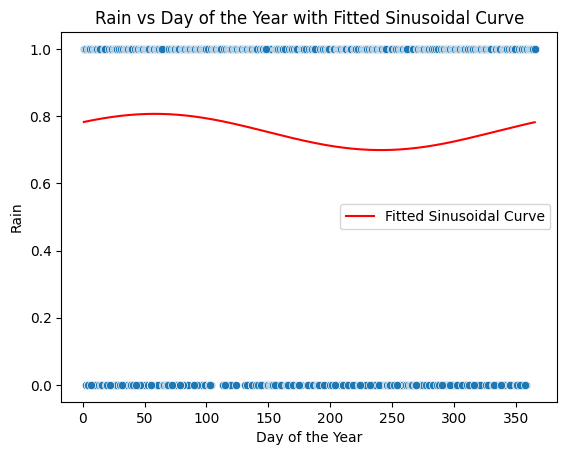

In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.optimize import curve_fit

import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('data/train.csv')

# Visualize the day and rain features
sns.scatterplot(x='day', y='rainfall', data=data)
plt.xlabel('Day of the Year')
plt.ylabel('Rain')
plt.title('Rain vs Day of the Year')
plt.show()

# Define a sinusoidal function to fit the data
def sinusoidal(x, amplitude, phase, offset):
    return amplitude * np.sin(2 * np.pi * x / 365 + phase) + offset

# Fit the sinusoidal function to the data
days = data['day']
rain = data['rainfall']
params, _ = curve_fit(sinusoidal, days, rain, p0=[max(rain), 0, np.mean(rain)])

# Generate data for the fitted curve
days_fit = np.linspace(1, 365, 365)
rain_fit = sinusoidal(days_fit, *params)

# Plot the fitted curve
plt.plot(days_fit, rain_fit, color='red', label='Fitted Sinusoidal Curve')
sns.scatterplot(x='day', y='rainfall', data=data)
plt.xlabel('Day of the Year')
plt.ylabel('Rain')
plt.title('Rain vs Day of the Year with Fitted Sinusoidal Curve')
plt.legend()
plt.show()